#                       Modelo de Tratamento da Base do Reclame Aqui

In [1]:
#Importar lib
import pandas as pd
import numpy as np
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

#lendo o dataset material do Erick que fez a raspagem
#df = pd.read_csv('avaliados_lista2.csv', encoding = 'utf-8-sig') #abre csv
df = pd.read_excel('loja_online.xlsx', encoding = 'utf-8-sig') #abre xlsx

#carrega dataset da nota de stress que está na base do SQLDB_DATASCIENCE_GPA 
df_stress = pd.read_csv('Id_Reclamacao_Stress2.csv', sep=';', decimal=',', encoding = 'utf-8-sig')

#Removendo algumas conlunas do material do Erick
df = df.drop('ID_interacoes',axis=1)
df = df.drop('Data_modificacao_ultima_interacao',axis=1)
df = df.drop('Serial_interacao',axis=1)
df = df.drop('Categoria',axis=1)
df = df.drop('Produtos',axis=1)

#Testando o dataset
#df_stress.head()
df.head()

,ID,Resolucao,UF,Cidade,Origem_reclamacao,Data_reclamacao,Data_primeira_interacao,Problemas,Nota,Retorno_negocio,Quantidade_interacoes,Data_criacao_ultima_interacao
0,92909187,Resolvido,GO,Goiânia,WHATSAPP,2019-07-02T16:00:24,2019-07-02T16:44:41,Atraso na entrega,10,Sim,2,2019-07-02T16:56:24
1,92899293,Resolvido,RJ,Rio de Janeiro,MOBILE,2019-07-02T12:17:50,2019-07-03T10:34:40,Produto não recebido,5,Sim,2,2019-07-03T10:43:54
2,92891377,Não resolvido,MG,Pará de Minas,SITE,2019-07-02T09:32:39,2019-07-02T15:52:45,Estorno do valor pago,1,Não,2,2019-07-02T16:04:38
3,92857297,Não resolvido,RS,Pelotas,MOBILE,2019-07-01T11:09:36,2019-07-02T11:20:06,Troca-Devolução de produto,0,Não,2,2019-07-02T19:49:51
4,92851225,Não resolvido,MG,Pará de Minas,SITE,2019-07-01T08:51:27,2019-07-02T15:50:39,Propaganda enganosa,1,Não,2,2019-07-02T16:06:23


In [2]:
#Juntar as bases Erick + Base com Stress (SQLDB_DATASCIENCE_GPA) pelo Id 
dataset = pd.merge(df_stress,df,how='inner',on='ID') 
#dataset.head()
dataset.describe()

,ID,Stress,Nota,Quantidade_interacoes
count,4.000000e+02,400.000000,400.000000,400.000000
mean,9.231400e+07,54.298638,6.210000,2.377500
std,2.202253e+05,10.573155,3.740438,0.884279
min,9.162901e+07,29.264578,0.000000,2.000000
25%,9.214450e+07,44.435307,4.000000,2.000000
50%,9.227546e+07,57.329682,7.000000,2.000000
75%,9.243928e+07,62.462063,10.000000,2.000000
max,9.290919e+07,76.050795,10.000000,9.000000


In [3]:
#Retirar o T das datas
dataset['Data_reclamacao'] = dataset['Data_reclamacao'].str.replace("[T]", " ")
dataset['Data_primeira_interacao'] = dataset['Data_primeira_interacao'].str.replace("[T]", " ")
dataset['Data_criacao_ultima_interacao'] = dataset['Data_criacao_ultima_interacao'].str.replace("[T]", " ")

#Converter data_reclamação, data_primeira_interação, data_criacao_ultima_interação para datetime
dataset['Data_reclamacao'] =  pd.to_datetime(dataset.Data_reclamacao, format='%Y-%m-%d %H:%M:%S')
dataset['Data_primeira_interacao'] =  pd.to_datetime(dataset.Data_primeira_interacao, format='%Y-%m-%d %H:%M:%S')
dataset['Data_criacao_ultima_interacao'] =  pd.to_datetime(dataset.Data_criacao_ultima_interacao, format='%Y-%m-%d %H:%M:%S')

dataset.head()

,ID,Stress,Resolucao,UF,Cidade,Origem_reclamacao,Data_reclamacao,Data_primeira_interacao,Problemas,Nota,Retorno_negocio,Quantidade_interacoes,Data_criacao_ultima_interacao
0,92717803,62.772392,Resolvido,PE,Araripina,SITE,2019-06-25 23:51:23,2019-06-26 10:59:27,Tela manchada,7,Não,2,2019-07-01 19:03:46
1,92509361,62.582274,Resolvido,SP,Guarulhos,MOBILE,2019-06-18 09:17:17,2019-06-19 16:30:58,Divergência de valores,5,Não,2,2019-06-27 16:49:08
2,92517351,38.341687,Resolvido,MG,Belo Horizonte,MOBILE,2019-06-18 12:05:05,2019-06-18 12:23:37,Produto indisponível,2,Não,3,2019-06-21 17:21:50
3,92518107,59.226677,Resolvido,ES,Colatina,MOBILE,2019-06-18 12:22:43,2019-06-18 16:27:18,Instalação-Reparo não concluídos,10,Sim,2,2019-06-25 18:44:54
4,92519057,59.120840,Resolvido,SP,São Paulo,SITE,2019-06-18 12:46:35,2019-06-25 15:35:50,Produto errado,8,Não,2,2019-07-02 11:16:46


In [4]:
#Verificando os tipos de dados no dataset
dataset.dtypes

ID                                        int64
Stress                                  float64
Resolucao                                object
UF                                       object
Cidade                                   object
Origem_reclamacao                        object
Data_reclamacao                  datetime64[ns]
Data_primeira_interacao          datetime64[ns]
Problemas                                object
Nota                                      int64
Retorno_negocio                          object
Quantidade_interacoes                     int64
Data_criacao_ultima_interacao    datetime64[ns]
dtype: object

# Novos atributos

In [5]:
#Criando novos atributos no dataset

#diferenca entre o tempo de espera para a primeira interação em minutos
dataset['tempo_espera_primeira']= (dataset['Data_primeira_interacao'] - dataset['Data_reclamacao'])/np.timedelta64(1,'m')
#dataset['tempo_espera_primeira']= dataset['Tempo_Espera_Primeira']/np.timedelta64(1,'m')

#tempo de espera para o total do atendimento em minutos
dataset['tempo_total_atendimento']= (dataset['Data_criacao_ultima_interacao'] - dataset['Data_reclamacao'])/np.timedelta64(1,'m')
#dataset['tempo_total_atendimento']= dataset['Tempo_Total_Atendimento']/np.timedelta64(1,'m')

#pegar dia da semana
dataset['dia_semana_reclamacao']= dataset['Data_reclamacao'].dt.dayofweek
dataset['dia_semana_primeira_interacao']= dataset['Data_primeira_interacao'].dt.dayofweek
dataset['dia_semana_ultima_interacao']= dataset['Data_criacao_ultima_interacao'].dt.dayofweek

#ano
dataset['ano_reclamacao']= dataset['Data_reclamacao'].dt.year 
dataset['ano_primeira_interacao']= dataset['Data_primeira_interacao'].dt.year 
dataset['ano_ultima_interacao']= dataset['Data_criacao_ultima_interacao'].dt.year 

#dia
dataset['dia_reclamacao']= dataset['Data_reclamacao'].dt.day
dataset['dia_primeira_interacao']= dataset['Data_primeira_interacao'].dt.day
dataset['dia_ultima_interacao']= dataset['Data_criacao_ultima_interacao'].dt.day

#mês
dataset['mes_reclamacao']= dataset['Data_reclamacao'].dt.month
dataset['mes_primeira_interacao']= dataset['Data_primeira_interacao'].dt.month
dataset['mes_ultima_interacao']= dataset['Data_criacao_ultima_interacao'].dt.month

#quinzena do mês
# falta fazer

#pegar hora
dataset['hora_reclamacao']= dataset['Data_reclamacao'].dt.hour
dataset['hora_primeira_interacao']= dataset['Data_primeira_interacao'].dt.hour
dataset['hora_ultima_interacao']= dataset['Data_criacao_ultima_interacao'].dt.hour

#pegar minutos
dataset['min_reclamacao']= dataset['Data_reclamacao'].dt.minute
dataset['min_primeira_interacao']= dataset['Data_primeira_interacao'].dt.minute
dataset['min_ultima_interacao']= dataset['Data_criacao_ultima_interacao'].dt.minute

#grupo de notas
#colocar o valor das notas na escala prevista
#2 é nota alta, 1 é nota neutra e 0 nota baixa
def grupo_notas(nota):
    if nota >= 8:
       return '2'
    elif nota >= 7:
       return '1'
    else:
       return '0'

dataset['grupo_notas'] = dataset['Nota'].apply(grupo_notas)

dataset.head()

,ID,Stress,Resolucao,UF,Cidade,Origem_reclamacao,Data_reclamacao,Data_primeira_interacao,Problemas,Nota,...,mes_reclamacao,mes_primeira_interacao,mes_ultima_interacao,hora_reclamacao,hora_primeira_interacao,hora_ultima_interacao,min_reclamacao,min_primeira_interacao,min_ultima_interacao,grupo_notas
0,92717803,62.772392,Resolvido,PE,Araripina,SITE,2019-06-25 23:51:23,2019-06-26 10:59:27,Tela manchada,7,...,6,6,7,23,10,19,51,59,3,1
1,92509361,62.582274,Resolvido,SP,Guarulhos,MOBILE,2019-06-18 09:17:17,2019-06-19 16:30:58,Divergência de valores,5,...,6,6,6,9,16,16,17,30,49,0
2,92517351,38.341687,Resolvido,MG,Belo Horizonte,MOBILE,2019-06-18 12:05:05,2019-06-18 12:23:37,Produto indisponível,2,...,6,6,6,12,12,17,5,23,21,0
3,92518107,59.226677,Resolvido,ES,Colatina,MOBILE,2019-06-18 12:22:43,2019-06-18 16:27:18,Instalação-Reparo não concluídos,10,...,6,6,6,12,16,18,22,27,44,2
4,92519057,59.120840,Resolvido,SP,São Paulo,SITE,2019-06-18 12:46:35,2019-06-25 15:35:50,Produto errado,8,...,6,6,7,12,15,11,46,35,16,2


In [6]:
# label Encoding
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
dataset['Resolucao']= label_encoder.fit_transform(dataset['Resolucao'])
dataset['UF']= label_encoder.fit_transform(dataset['UF'])
dataset['Cidade']= label_encoder.fit_transform(dataset['Cidade'])
dataset['Origem_reclamacao']= label_encoder.fit_transform(dataset['Origem_reclamacao'])
dataset['Problemas']= label_encoder.fit_transform(dataset['Problemas'])
dataset['Retorno_negocio']= label_encoder.fit_transform(dataset['Retorno_negocio'])

#Caso deseje saber quem são os label Encoding de cada Atributo
#df['UF'].unique() 
#df['Cidade'].unique() 
#df['Origem_reclamacao'].unique() 
#df['Problemas'].unique() 
#df['Retorno_negocio'].unique()

dataset.head()

,ID,Stress,Resolucao,UF,Cidade,Origem_reclamacao,Data_reclamacao,Data_primeira_interacao,Problemas,Nota,...,mes_reclamacao,mes_primeira_interacao,mes_ultima_interacao,hora_reclamacao,hora_primeira_interacao,hora_ultima_interacao,min_reclamacao,min_primeira_interacao,min_ultima_interacao,grupo_notas
0,92717803,62.772392,1,13,5,2,2019-06-25 23:51:23,2019-06-26 10:59:27,44,7,...,6,6,7,23,10,19,51,59,3,1
1,92509361,62.582274,1,20,59,1,2019-06-18 09:17:17,2019-06-19 16:30:58,9,5,...,6,6,6,9,16,16,17,30,49,0
2,92517351,38.341687,1,8,9,1,2019-06-18 12:05:05,2019-06-18 12:23:37,37,2,...,6,6,6,12,12,17,5,23,21,0
3,92518107,59.226677,1,5,32,1,2019-06-18 12:22:43,2019-06-18 16:27:18,14,10,...,6,6,6,12,16,18,22,27,44,2
4,92519057,59.120840,1,20,163,2,2019-06-18 12:46:35,2019-06-25 15:35:50,36,8,...,6,6,7,12,15,11,46,35,16,2


# Exportar para CSV

In [7]:
#exportar o dataset para cvs
dataset.to_csv('Teste.csv', sep=';', index=False, encoding="utf-8-sig", decimal=',')

# Vizualizar dados Target

D:\Programas Instalados\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Programas Instalados\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


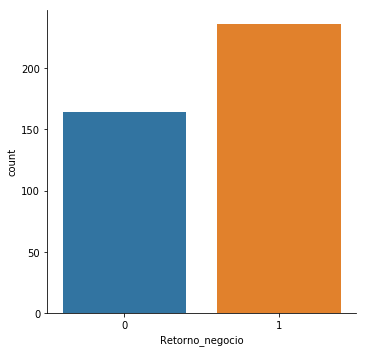

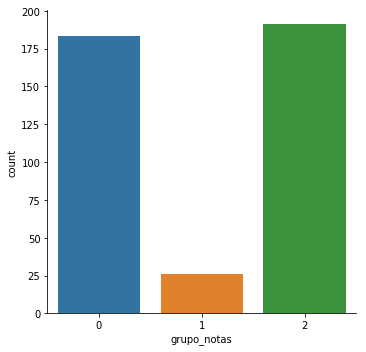

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.factorplot('Retorno_negocio', data=dataset, kind='count')
sns.factorplot('grupo_notas', data=dataset, kind='count')

# Modelos

In [9]:
# criação do modelo de RandomForestRegressor

#aqui ela retorna um valor numérico caso queria, por exemplo o valor da nota.
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

#dividir treino e teste
X = dataset.iloc[:, 0:4].values  
y = dataset.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

#medir o modelo de regressão
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
'''

"\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestRegressor\n\n#dividir treino e teste\nX = dataset.iloc[:, 0:4].values  \ny = dataset.iloc[:, 4].values  \n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  \n\n\nsc = StandardScaler()  \nX_train = sc.fit_transform(X_train)  \nX_test = sc.transform(X_test) \n\nregressor = RandomForestRegressor(n_estimators=20, random_state=0)  \nregressor.fit(X_train, y_train)  \ny_pred = regressor.predict(X_test) \n\n#medir o modelo de regressão\nfrom sklearn import metrics\n\nprint('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  \nprint('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  \nprint('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) \n"

In [10]:
# criação do modelo de RandomForestClassifier para train_test_split

# Importar train_test_split function
from sklearn.model_selection import train_test_split
#Importar Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Importar modulo de metrica do scikit-learn para calcular a accuracy
from sklearn import metrics

X=dataset[['Stress','Resolucao','UF','Cidade',
           'Origem_reclamacao','Problemas','Nota','Quantidade_interacoes',
           'tempo_espera_primeira','tempo_total_atendimento','dia_semana_reclamacao',
           'dia_semana_primeira_interacao','dia_semana_ultima_interacao','ano_reclamacao',
           'ano_primeira_interacao','ano_ultima_interacao','dia_reclamacao','dia_primeira_interacao',
           'dia_ultima_interacao','mes_reclamacao','mes_primeira_interacao','mes_ultima_interacao',
           'hora_reclamacao','hora_primeira_interacao','hora_ultima_interacao','min_reclamacao',
           'min_primeira_interacao','min_ultima_interacao','grupo_notas']]  # Features

y=dataset['Retorno_negocio']  # Target

# Split dataset training set e teste set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5) # 70% teino e 30% teste

#Criar a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Trainar o modelo usando o y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# Accuracy da classificação modelo split?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Predição caso você queria entrar com uma nova reclamação
#clf.predict([[42,23704392;0;2;136;0;32;0;2;3421,366666666667;3430,616666666667;5;0;0;2019;2019;2019;8;10;10;6;6;6;0;9;10;58;59;8;0]])

#Métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("## Mean AUC Score - Random Forest: ##", clf_cv_score.mean())
print('\n')


D:\Programas Instalados\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 0.85
=== Confusion Matrix ===
[[41 10]
 [ 8 61]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.84      0.80      0.82        51
          1       0.86      0.88      0.87        69

avg / total       0.85      0.85      0.85       120



=== All AUC Scores ===
[0.84681373 0.92401961 0.91176471 0.96323529 0.77604167 0.93098958
 0.79619565 0.94565217 0.95380435 0.88994565]


=== Mean AUC Score ===
## Mean AUC Score - Random Forest: ## 0.8938462409420287




# Fazer um Tuning no RandomForestClassifier

In [11]:
#achei bacana esse modelo https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV

# número de árvores no random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# número de features em cada split
max_features = ['auto', 'sqrt']

# máximo depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# criar random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# pesquisa aleatória de parametro
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# treinar o modelo
clf_random.fit(X_train, y_train)

# print resultados
print(clf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


{'n_estimators': 1400, 'max_features': 'auto', 'max_depth': 100}


In [12]:
#Testando o Tuning
clf = RandomForestClassifier(n_estimators=1000, max_depth=140, max_features='sqrt')
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

#Accuracy da classificação do Tuning?
print("Accuracy by Tuning:",metrics.accuracy_score(y_test, y_pred))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(clf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("## Mean AUC Score - Random Forest: ##", clf_cv_score.mean())

Accuracy by Tuning: 0.85
=== Confusion Matrix ===
[[41 10]
 [ 8 61]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.84      0.80      0.82        51
          1       0.86      0.88      0.87        69

avg / total       0.85      0.85      0.85       120



=== All AUC Scores ===
[0.84681373 0.93382353 0.91789216 0.96568627 0.78255208 0.9375
 0.79619565 0.95108696 0.95652174 0.88586957]


=== Mean AUC Score ===
## Mean AUC Score - Random Forest: ## 0.8973941682651321


# Verificando Feature Relevantes

In [13]:
#Teste feito para vê a relevância das feature
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print("=== Feature Relevantes ===")
feature_imp


=== Feature Relevantes ===


Nota                             0.238752
grupo_notas                      0.160782
Resolucao                        0.111936
Stress                           0.036178
Problemas                        0.035629
tempo_espera_primeira            0.035157
min_ultima_interacao             0.030199
tempo_total_atendimento          0.030004
Cidade                           0.029032
hora_ultima_interacao            0.028348
dia_reclamacao                   0.026391
min_reclamacao                   0.025445
min_primeira_interacao           0.024652
dia_primeira_interacao           0.024434
hora_primeira_interacao          0.022828
dia_ultima_interacao             0.022660
hora_reclamacao                  0.020914
dia_semana_reclamacao            0.016570
dia_semana_primeira_interacao    0.016261
UF                               0.015217
dia_semana_ultima_interacao      0.015101
Quantidade_interacoes            0.014944
Origem_reclamacao                0.010739
mes_reclamacao                   0

No handles with labels found to put in legend.


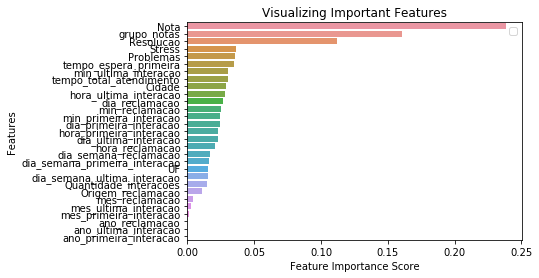

In [14]:
# Criar o grafico de barra das Feature Relevantes
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adicionar os Labels no grafico
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
'''
#pegar uma instancia do dataset
a= X_test.iloc[:1]
#print(X_test.iloc[:1])
#exportar o dataset para cvs
a.to_csv('instancia.csv', sep=',', index=False, encoding="utf-8-sig", decimal='.')
'''

'\n#pegar uma instancia do dataset\na= X_test.iloc[:1]\n#print(X_test.iloc[:1])\n#exportar o dataset para cvs\na.to_csv(\'instancia.csv\', sep=\',\', index=False, encoding="utf-8-sig", decimal=\'.\')\n'

In [16]:
#Predição caso você queria entrar com uma nova reclamação
clf.predict([[42.23704392,0,2,136,0,32,0,2,3421.366666666667,3430.616666666667,5,0,0,2019,2019,2019,8,10,10,6,6,6,0,9,10,58,59,8,0
]])

#colocar aqui o calculo do resultado da predição



array([0], dtype=int64)